<a href="https://colab.research.google.com/github/mews2000/mews2000.github.io/blob/main/day21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21번째 이야기
- XGBoost와 LightGBM
- 하이퍼파라미터 튜닝
- 깃팀플 협업

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
# 전처리
# 모델
# 학습
# 성능평가
# 하이퍼파라미터 튜닝

In [ ]:
from xgboost import XGBRegressor

data.dropna(inplace=True)
y = data.pop('count')
X = data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
scaler.fit(X)
mm_X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(mm_X,y,test_size=0.2)


# XGBoost
# LightGBM

In [ ]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)

NameError: ignored

- callbacks

In [ ]:
def say_hello():
    print('Hello')

In [ ]:
def many_work(callback):
    print('do something')
    callback()
    print('do somthing again')

In [ ]:
many_work(say_hello)

In [ ]:
def makegraph():
    print('Make Graph')

In [ ]:
def xgb_fit(callbacks=[]):
    print("machine learning")
    for callback in callbacks:
        callback()
    print("machine learning again")

In [ ]:
xgb_fit(callbacks=[makegraph])

In [ ]:
# 성능 측정
from sklearn.metrics import r2_score

pred = xgb_model.predict(X_test)
r2_score(y_test,pred)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(pred[:50],'m-',y_test.to_numpy()[:50],'c-')

# 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# hyper parameters

param_grid = {
    'learning_rate':[0.01,0.05,0.1],
    'max_depth':[3,5,7]
}

xgb_model = XGBRegressor()
grid_search=GridSearchCV(xgb_model,param_grid,scoring='r2',cv=3,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7]},
             scoring='r2', verbose=1)

In [ ]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 5}

In [ ]:
grid_search.best_score_

0.7613079161736316

In [ ]:
from sklearn.preprocessing import StandardScaler
stscaler =  StandardScaler()

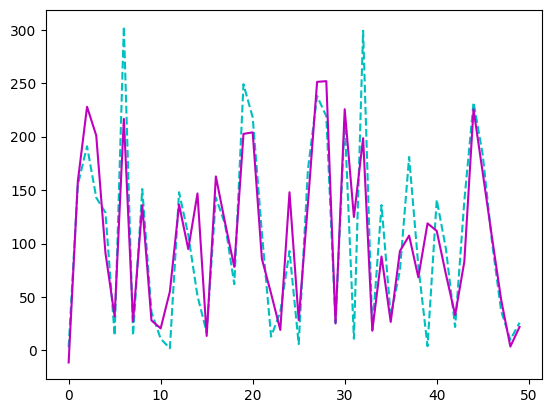

In [ ]:
from lightgbm import LGBMRegressor

st_X = stscaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(st_X,y,test_size=0.2)
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train,y_train)
pred = lgbm_model.predict(X_test)
r2_score(y_test,pred)

plt.plot(y_test.to_numpy()[:50],'c--',pred[:50],'m-')

In [ ]:
# hyper parameters
lgbm_model = LGBMRegressor()
param_grid =    {'learning_rate':[0.01,0.03, 0.05,0.07,0.1],
    'max_depth': [1,3,5,7,9,10],
    'min_child_weight':[1,3,5,7,9,10],
    'subsample':[0.1,0.3,0.5,0.7,1],
    'colsample_bytree':[0.1,0.3,0.5,0.7,1]}
grid_search2 = GridSearchCV(lgbm_model,param_grid,scoring='r2',cv=5,verbose=1)
grid_search2.fit(X_train,y_train)

Fitting 5 folds for each of 4500 candidates, totalling 22500 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 1],
                         'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
                         'max_depth': [1, 3, 5, 7, 9, 10],
                         'min_child_weight': [1, 3, 5, 7, 9, 10],
                         'subsample': [0.1, 0.3, 0.5, 0.7, 1]},
             scoring='r2', verbose=1)

In [ ]:
grid_search2.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.1}

In [ ]:
grid_search2.best_score_

0.7488479182754768

In [ ]:
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from datetime import datetime,timedelta
import math



data = pd.read_csv('/content/drive/MyDrive/new_preprocessed/state_modified.csv')

data_copy = data.copy()

data_copy.reset_index(drop=False,inplace=True) # 제거된 열로 인해 번호가 안맞는 index 재설정

data_copy['Delay_Delayed'] = data_copy['Delay_Delayed'].astype(int)
data_copy['Delay_Not_Delayed'] = data_copy['Delay_Not_Delayed'].astype(int)

"""
#######################################################################################33
# OPEN file : train.csv


# extract data of time and distance
target_data=['Estimated_Departure_Time','Estimated_Arrival_Time','Distance']
time_distance=data_copy[target_data]
time_distance.dropna(subset=['Estimated_Arrival_Time'], inplace=True)

# index list of departure_time isnull()
index_dep=time_distance[time_distance['Estimated_Departure_Time'].isna()].index

# dataframe of departure_time isnull()
departure_data=time_distance.loc[index_dep]

# drop remaining NaN values to operate modeling
time_distance.dropna(inplace=True)

# training
y=time_distance.pop('Estimated_Departure_Time')
X=time_distance
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# modeling
model_dep=RandomForestRegressor()
model_dep.fit(X_train, y_train)

# modeling check
pred=model_dep.predict(X_test)
r2_score(y_test, pred)

# project NaN data of Departure Time
departure_data_bak=departure_data.copy()
dep_y=departure_data.pop('Estimated_Departure_Time')
dep_X=departure_data
pred=model_dep.predict(dep_X)
departure_data_bak['Estimated_Departure_Time']=pred

# fill the estimated departure_time_data to original dataframe
data_copy.loc[departure_data_bak.index, 'Estimated_Departure_Time']=departure_data_bak['Estimated_Departure_Time']

# OPEN file : train.csv
# data_copy=pd.read_csv('./open/train.csv')

# extract data of time and distance
target_data=['Estimated_Departure_Time','Estimated_Arrival_Time','Distance']
time_distance=data_copy[target_data]
time_distance.dropna(subset=['Estimated_Departure_Time'], inplace=True)

# index list of arrival_time isnull()
index_dep=time_distance[time_distance['Estimated_Arrival_Time'].isna()].index

# dataframe of arrival_time isnull()
departure_data=time_distance.loc[index_dep]

# drop remaining NaN values to operate modeling
time_distance.dropna(inplace=True)

# training
y=time_distance.pop('Estimated_Arrival_Time')
X=time_distance
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# modeling
model_dep=RandomForestRegressor()
model_dep.fit(X_train, y_train)

# modeling check
pred=model_dep.predict(X_test)
r2_score(y_test, pred)

# project NaN data of Arrival Time
departure_data_bak=departure_data.copy()
dep_y=departure_data.pop('Estimated_Arrival_Time')
dep_X=departure_data
pred=model_dep.predict(dep_X)
departure_data_bak['Estimated_Arrival_Time']=pred

# fill the estimated arrival_time_data to original dataframe
data_copy.loc[departure_data_bak.index, 'Estimated_Arrival_Time']=departure_data_bak['Estimated_Arrival_Time']
print(data_copy.isna().sum())

##############################################################################################################

def to_int(num):
  if pd.isna(num):
    return pd.NaT
  else:
    return int(num)

###############################################################################################################
"""
def time_format_change(num):
    if pd.isna(num):
        return None
    else :
        num = int(num)
        if num == 2400:
            return '0000'
        return '{:04d}'.format(num)
        # a = '{:04d}'.format(num)
        # temp = list(a)
        # if '6' <= temp[2] <='9':
        #   temp[2] = '0'
        #   temp[1] = str(int(temp[1])+1)
        #   output = "".join(temp)
        #   return output

        # if temp[2] == '6':
        #   temp[2] = '0'
        #   temp[1] = str(int(temp[1])+1)
        #   output = "".join(temp)
        #   return output
        # if temp[2] == '7':
        #   temp[2] = '1'
        #   temp[1] = str(int(temp[1])+1)
        #   output = "".join(temp)
        #   return output
        # if temp[2] == '8':
        #   temp[2] = '2'
        #   temp[1] = str(int(temp[1])+1)
        #   output = "".join(temp)
        #   return output
        # if temp[2] == '9':
        #   temp[2] = '3'
        #   temp[1] = str(int(temp[1])+1)
        #   output = "".join(temp)
        #   return output
        # else:
        #   return a

# data_copy['Estimated_Departure_Time'] = data_copy['Estimated_Departure_Time'].apply(to_int)
# data_copy['Estimated_Arrival_Time'] = data_copy['Estimated_Arrival_Time'].apply(to_int)

print(data_copy.isna().sum())


data_copy['Estimated_Departure_Time']=data_copy['Estimated_Departure_Time'].apply(time_format_change)
data_copy['Estimated_Arrival_Time']=data_copy['Estimated_Arrival_Time'].apply(time_format_change)


def create_departure_timedate(group): # datetime format을 맞추기 위해 임의로 연도를 2022년으로 설정
    if pd.isna(group['Estimated_Departure_Time']):
        group['Estimated_Departure_Datetime'] = pd.NaT
        return group
    else :
        group['Estimated_Departure_Datetime'] = datetime(year=2022,month=group['Month'],day=group['Day_of_Month'],hour=int(group['Estimated_Departure_Time'][:2]),minute=int(group['Estimated_Departure_Time'][2:]))
        return group

def create_arrival_timedate(group):
    if pd.isna(group['Estimated_Arrival_Time']):
        group['Estimated_Arrival_Datetime'] = pd.NaT
        return group
    else :
        group['Estimated_Arrival_Datetime'] = datetime(year=2022,month=group['Month'],day=group['Day_of_Month'],hour=int(group['Estimated_Arrival_Time'][:2]),minute=int(group['Estimated_Arrival_Time'][2:]))
        return group

data_copy = data_copy.apply(create_departure_timedate,axis=1)
data_copy = data_copy.apply(create_arrival_timedate,axis=1)

data_copy['Estimated_Arrival_Datetime'] = data_copy.apply(lambda row: row['Estimated_Arrival_Datetime'] + timedelta(days=1) if (not pd.isna(row['Estimated_Departure_Datetime'])) and (not pd.isna(row['Estimated_Arrival_Datetime'])) and (row['Estimated_Departure_Datetime'] > row['Estimated_Arrival_Datetime']) else row['Estimated_Arrival_Datetime'], axis=1)



data_copy['Estimated_Departure_Datetime']=pd.to_datetime(data_copy['Estimated_Departure_Datetime'])
data_copy['Estimated_Arrival_Datetime']=pd.to_datetime(data_copy['Estimated_Arrival_Datetime'])
data_copy['Elapsed_Time'] = data_copy.apply(lambda row: row['Estimated_Arrival_Datetime'] - row['Estimated_Departure_Datetime'] if (not pd.isna(row['Estimated_Departure_Datetime'])) and (not pd.isna(row['Estimated_Arrival_Datetime'])) else pd.NaT, axis=1)

def fill_elapsed(group):
    elapsed_mean = group['Elapsed_Time'].mean()
    group['Elapsed_Time'].fillna(elapsed_mean,inplace=True)
    return group

data_copy = data_copy.groupby(['Month','Origin_Airport','Destination_Airport','Distance', 'Airline','Tail_Number']).apply(fill_elapsed).reset_index(drop=True)

data_copy = data_copy.groupby(['Month','Origin_Airport','Destination_Airport','Distance', 'Airline']).apply(fill_elapsed).reset_index(drop=True)

data_copy = data_copy.groupby(['Month','Origin_Airport','Destination_Airport','Distance']).apply(fill_elapsed).reset_index(drop=True)

data_copy = data_copy.groupby(['Origin_Airport','Destination_Airport','Distance','Airline']).apply(fill_elapsed).reset_index(drop=True)

data_copy = data_copy.groupby(['Origin_Airport','Destination_Airport','Airline']).apply(fill_elapsed).reset_index(drop=True)

data_copy = data_copy.groupby(['Origin_Airport','Destination_Airport','Distance']).apply(fill_elapsed).reset_index(drop=True)


data_copy['Estimated_Arrival_Datetime'] = data_copy.apply(lambda row: row['Estimated_Departure_Datetime'] + row['Elapsed_Time'] if (not pd.isna(row['Estimated_Departure_Datetime'])) and (not pd.isna(row['Elapsed_Time'])) else row['Estimated_Arrival_Datetime'],axis = 1)

data_copy['Estimated_Departure_Datetime'] = data_copy.apply(lambda row: row['Estimated_Arrival_Datetime'] - row['Elapsed_Time'] if (not pd.isna(row['Estimated_Arrival_Datetime'])) and (not pd.isna(row['Elapsed_Time'])) else row['Estimated_Departure_Datetime'],axis = 1)

data_copy['Estimated_Arrival_Datetime'] = data_copy.apply(lambda row: row['Estimated_Departure_Datetime'] + row['Elapsed_Time'] if (not pd.isna(row['Estimated_Departure_Datetime'])) and (not pd.isna(row['Elapsed_Time'])) else row['Estimated_Arrival_Datetime'],axis = 1)

data_copy['Estimated_Departure_Datetime'] = data_copy.apply(lambda row : row['Estimated_Arrival_Datetime'] - row['Elapsed_Time'] if (not pd.isna(row['Estimated_Arrival_Datetime'])) and (not pd.isna(row['Elapsed_Time'])) else row['Estimated_Departure_Datetime'],axis = 1)

data_copy['Estimated_Arrival_Datetime'] = data_copy.apply(lambda row: row['Estimated_Departure_Datetime'] + row['Elapsed_Time'] if (not pd.isna(row['Estimated_Departure_Datetime'])) and (not pd.isna(row['Elapsed_Time'])) else row['Estimated_Arrival_Datetime'],axis = 1)

data_copy['Estimated_Departure_Datetime'] = data_copy.apply(lambda row : row['Estimated_Arrival_Datetime'] - row['Elapsed_Time'] if (not pd.isna(row['Estimated_Arrival_Datetime'])) and (not pd.isna(row['Elapsed_Time'])) else row['Estimated_Departure_Datetime'],axis = 1)

# data_copy['Estimated_Arrival_Time'] = data_copy.apply(lambda row: datetime.time(row['Estimated_Arrival_Datetime']) if (not pd.isna(row['Estimated_Arrival_Datetime'])) else row['Estimated_Arrival_Time'],axis=1)

# data_copy['Estimated_Departure_Time'] = data_copy.apply(lambda row: datetime.time(row['Estimated_Departure_Datetime']) if (not pd.isna(row['Estimated_Departure_Datetime'])) else row['Estimated_Departure_Time'],axis=1)


# 학습을 위해 시간 데이터를 각 요소 별로 정수형으로 분리한다.
########################################################

data_copy['E_D_M'] = data_copy.apply(lambda row : row['Estimated_Departure_Datetime'].month,axis=1)
data_copy['E_D_D'] = data_copy.apply(lambda row : row['Estimated_Departure_Datetime'].day,axis=1)
data_copy['E_D_H'] = data_copy.apply(lambda row : row['Estimated_Departure_Datetime'].hour,axis=1)
data_copy['E_D_m'] = data_copy.apply(lambda row : row['Estimated_Departure_Datetime'].minute,axis=1)

data_copy['E_A_M'] = data_copy.apply(lambda row : row['Estimated_Arrival_Datetime'].month,axis=1)
data_copy['E_A_D'] = data_copy.apply(lambda row : row['Estimated_Arrival_Datetime'].day,axis=1)
data_copy['E_A_H'] = data_copy.apply(lambda row : row['Estimated_Arrival_Datetime'].hour,axis=1)
data_copy['E_A_m'] = data_copy.apply(lambda row : row['Estimated_Arrival_Datetime'].minute,axis=1)

data_copy['Elapsed_Time'] = data_copy.apply(lambda row : row['Elapsed_Time'].seconds // 60 ,axis=1)


"""
########################################################

def airline_fillna(col1, col2):
    dt_array = data_copy[col1].dropna().unique()
    for i in dt_array:
        id = data_copy[data_copy[col1]==i][col2].dropna().unique()[0]
        data_copy.loc[data_copy[col1]==i, col2] = data_copy[data_copy[col1]==i][col2].fillna(id)

airline_fillna('Airline', 'Carrier_ID(DOT)')

# 1:1로 대응되는 Carrier_Code와 Carrier_ID 데이터를 이용하여 결측치 추가 제거(결측치: 2,185행)
for i in ['WN', 'NK', 'B6', 'F9', 'G4', 'VX']:
    id = data_copy[data_copy['Carrier_Code(IATA)']==i]['Carrier_ID(DOT)'].dropna().unique()[0]
    data_copy.loc[data_copy['Carrier_Code(IATA)']==i, 'Carrier_ID(DOT)'] = data_copy[data_copy['Carrier_Code(IATA)']==i]['Carrier_ID(DOT)'].fillna(id)

# carrier_id 결측치(2,185행) 삭제
data_copy = data_copy.dropna(subset=['Carrier_ID(DOT)'], axis=0).reset_index(drop=True)

# origin_state / destination_state / tail_number 인코딩
le = LabelEncoder()
data_copy_tail = le.fit_transform(data_copy['Tail_Number'])
data_copy_or = le.fit_transform(data_copy['Origin_State'])
data_copy_de = le.fit_transform(data_copy['Destination_State'])
data_copy_le = pd.DataFrame({'tail_num': data_copy_tail, 'origin_st':data_copy_or, 'destination_st':data_copy_de})

data = pd.concat([data_copy, data_copy_le], axis=1)






# 필요 없는 컬럼 삭제
data_copy.drop(['Airline', 'Carrier_Code(IATA)'], axis=1, inplace=True)
data_copy.drop(['Cancelled', 'Diverted', 'Origin_Airport', 'Destination_Airport', 'Delay_Not_Delayed'], axis=1, inplace=True)
data_copy.drop(['ID', 'Origin_State', 'Destination_State'], axis=1, inplace=True)
data_copy.drop(['Estimated_Arrival_Time','Estimated_Departure_Time','Estimated_Arrival_Datetime','Estimated_Departure_Datetime','Month','Day_of_Month'],axis=1,inplace=True)



"""
data_copy.to_csv('preprocessed_02.csv')



level_0                         0
Unnamed: 0                      0
index                           0
ID                              0
Month                           0
Day_of_Month                    0
Estimated_Departure_Time    27841
Estimated_Arrival_Time      27684
Cancelled                       0
Diverted                        0
Origin_Airport                  0
Origin_Airport_ID               0
Origin_State                    0
Destination_Airport             0
Destination_Airport_ID          0
Destination_State               0
Distance                        0
Airline                     27540
Carrier_Code(IATA)          27888
Carrier_ID(DOT)             27770
Tail_Number                     0
Delay_Delayed                   0
Delay_Not_Delayed               0
dtype: int64


<ipython-input-17-462e4480edd1>:196: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data_copy = data_copy.groupby(['Month','Origin_Airport','Destination_Airport','Distance', 'Airline','Tail_Number']).apply(fill_elapsed).reset_index(drop=True)
<ipython-input-17-462e4480edd1>:198: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .gro

In [ ]:
import pandas as pd
from datetime import datetime

data = pd.read_csv('/content/drive/MyDrive/date_time_column_added.csv')

data.drop(columns='Unnamed: 0.1',inplace=True)
data.drop(columns='Unnamed: 0',inplace=True)


data_copy = data.copy()
data_copy['Estimated_Departure_Datetime']=pd.to_datetime(data_copy['Estimated_Departure_Datetime'])
data_copy['Estimated_Arrival_Datetime']=pd.to_datetime(data_copy['Estimated_Arrival_Datetime'])
data_copy['Elapsed_Time'] = data_copy.apply(lambda row: row['Estimated_Arrival_Datetime'] - row['Estimated_Departure_Datetime'] if (not pd.isna(row['Estimated_Departure_Datetime'])) and (not pd.isna(row['Estimated_Arrival_Datetime'])) else pd.NaT, axis=1)

def fill_elapsed(group):
    elapsed_mean = group['Elapsed_Time'].mean()
    group['Elapsed_Time'].fillna(elapsed_mean,inplace=True)
    return group

data_copy = data_copy.groupby(['Month','Origin_Airport','Destination_Airport','Distance', 'Airline','Tail_Number']).apply(fill_elapsed).reset_index(drop=True)

data_copy = data_copy.groupby(['Month','Origin_Airport','Destination_Airport','Distance', 'Airline']).apply(fill_elapsed).reset_index(drop=True)

data_copy = data_copy.groupby(['Month','Origin_Airport','Destination_Airport','Distance']).apply(fill_elapsed).reset_index(drop=True)

data_copy['Estimated_Arrival_Datetime'] = data_copy.apply(lambda row: row['Estimated_Departure_Datetime'] + row['Elapsed_Time'] if (not pd.isna(row['Estimated_Departure_Datetime'])) and (not pd.isna(row['Elapsed_Time'])) else row['Estimated_Arrival_Datetime'],axis = 1)

data_copy['Estimated_Departure_Datetime'] = data_copy.apply(lambda row: row['Estimated_Arrival_Datetime'] - row['Elapsed_Time'] if (not pd.isna(row['Estimated_Departure_Datetime'])) and (not pd.isna(row['Elapsed_Time'])) else row['Estimated_Departure_Datetime'],axis = 1)

data_copy['Estimated_Arrival_Time'] = data_copy.apply(lambda row: datetime.time(row['Estimated_Arrival_Datetime']) if (not pd.isna(row['Estimated_Arrival_Datetime'])) else row['Estimated_Arrival_Time'],axis=1)

data_copy['Estimated_Departure_Time'] = data_copy.apply(lambda row: datetime.time(row['Estimated_Departure_Datetime']) if (not pd.isna(row['Estimated_Departure_Datetime'])) else row['Estimated_Departure_Time'],axis=1)


data_copy.to_csv('final_time_modified_day24.csv')


FileNotFoundError: ignored

In [ ]:
import pandas as pd

In [ ]:
data_2 = pd.read_csv('/content/drive/MyDrive/new_preprocessed/pro_2.csv')
data_2.drop(columns=['Unnamed: 0', 'index'],inplace=True)
data_2_dummy = pd.get_dummies(data_2,columns=['Origin_Airport_ID', 'Destination_Airport_ID',
       'Distance', 'Carrier_ID(DOT)', 'Elapsed_Time', 'E_D_M',
       'E_D_D', 'E_D_H', 'E_D_m', 'E_A_M', 'E_A_D', 'E_A_H', 'E_A_m',
       'tail_num', 'origin_st', 'destination_st'])
data_2_dummy.columns

Index(['Delay_Delayed', 'Origin_Airport_ID_10135', 'Origin_Airport_ID_10136',
       'Origin_Airport_ID_10140', 'Origin_Airport_ID_10141',
       'Origin_Airport_ID_10146', 'Origin_Airport_ID_10154',
       'Origin_Airport_ID_10155', 'Origin_Airport_ID_10157',
       'Origin_Airport_ID_10158',
       ...
       'destination_st_42', 'destination_st_43', 'destination_st_44',
       'destination_st_45', 'destination_st_46', 'destination_st_47',
       'destination_st_48', 'destination_st_49', 'destination_st_50',
       'destination_st_51'],
      dtype='object', length=9681)

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
data_2.dropna(inplace=True)


In [ ]:

import random
import os
import numpy as np
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer
from xgboost import XGBClassifier

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Fixed Seed

def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

csv_to_parquet('/content/drive/MyDrive/new_prerprocessed/train.csv', 'train')
csv_to_parquet('/content/drive/MyDrive/new_preprocessed/test.csv', 'test')

train = pd.read_parquet('./train.parquet')
test = pd.read_parquet('./test.parquet')
sample_submission = pd.read_csv('/content/drive/MyDrive/gaming project/sample_submission.csv', index_col = 0)

# Replace variables with missing values except for the label (Delay) with the most frequent values of the training data
# 컬럼의 누락된 값은 훈련 데이터에서 해당 컬럼의 최빈값으로 대체됩니다.
NaN_col = ['Origin_State','Destination_State','Airline','Estimated_Departure_Time', 'Estimated_Arrival_Time','Carrier_Code(IATA)','Carrier_ID(DOT)']

for col in NaN_col:
    mode = train[col].mode()[0]
    train[col] = train[col].fillna(mode)

    if col in test.columns:
        test[col] = test[col].fillna(mode)
print('Done.')

# Quantify qualitative variables
# 정성적 변수는 LabelEncoder를 사용하여 숫자로 인코딩됩니다.
qual_col = ['Origin_Airport', 'Origin_State', 'Destination_Airport', 'Destination_State', 'Airline', 'Carrier_Code(IATA)', 'Tail_Number']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train[i])
    train[i] = le.transform(train[i])

    for label in np.unique(test[i]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test[i] = le.transform(test[i])
print('Done.')

# Remove unlabeled data
# 훈련 세트에서 레이블이 지정되지 않은 데이터가 제거되고 숫자 레이블 열이 추가됩니다.
train = train.dropna()

column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i

def to_number(x, dic):
    return dic[x]

train.loc[:, 'Delay_num'] = train['Delay'].apply(lambda x: to_number(x, column_number))
print('Done.')

train_x = train.drop(columns=['ID', 'Delay', 'Delay_num'])
train_y = train['Delay_num']
test_x = test.drop(columns=['ID'])

# 교육 데이터는 교육 및 검증 세트로 분할되고 수치 기능은 StandardScaler를 사용하여 정규화됩니다.
# 모델은 GridSearchCV와 5겹 교차 검증을 사용하여 수행되는 하이퍼파라미터 튜닝과 함께 XGBClassifier를 사용하여 훈련됩니다.
# Split the training dataset into a training set and a validation set
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
val_x = scaler.transform(val_x)
test_x = scaler.transform(test_x)

# Cross-validation with StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model and hyperparameter tuning using GridSearchCV
model = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
}

grid = GridSearchCV(model,
                    param_grid,
                    cv=cv,
                    scoring='accuracy',
                    n_jobs=-1,
                    verbose=1)

grid.fit(train_x, train_y)

best_model = grid.best_estimator_

# Model evaluation
val_y_pred = best_model.predict(val_x)
accuracy = accuracy_score(val_y, val_y_pred)
f1 = f1_score(val_y, val_y_pred, average='weighted')
precision = precision_score(val_y, val_y_pred, average='weighted')
recall = recall_score(val_y, val_y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# 하이퍼파라미터 튜닝 결과를 바탕으로 최적의 모델을 선택하고 테스트 세트의 목표 변수를 예측하는 데 사용합니다.
# Model prediction
y_pred = best_model.predict_proba(test_x)
submission = pd.DataFrame(data=y_pred, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('optimized_submission.csv', index=True)


In [ ]:
stscaler2 = StandardScaler()
mmscaler2 = MinMaxScaler()

data_2_copy = data_2.copy()

y2 = data_2_copy.pop('Delay_Delayed')

stscaler2.fit(data_2_copy)
X2 =stscaler2.transform(data_2_copy)
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.1,stratify=y2,random_state=1)
# y2_test = y2_test.to_numpy()
xgbmodel2 = XGBClassifier()
lgbmmodel2 = LGBMClassifier()
knnmodel2 = KNeighborsClassifier()
rfmodel2 = RandomForestClassifier()
dtmodel2 = DecisionTreeClassifier()


xgbmodel2.fit(X2_train,y2_train)
xgb_pred3 = xgbmodel2.predict(X2_test)
print('XGBoost log loss :',log_loss(y2_test,xgb_pred3))
print('XGBoost f1 score :', f1_score(y2_test,xgb_pred3))

lgbmmodel2.fit(X2_train,y2_train)
lgbm_pred3 = lgbmmodel2.predict(X2_test)
fi = lgbmmodel2.feature_importances_
print('LightGBM feature importance',fi)
print('LightGBM log loss :',log_loss(y2_test,lgbm_pred3))
print('LightGBM f1 score :',f1_score(y2_test,lgbm_pred3))

# knnmodel3.fit(X2_train,y2_train)
# knn_pred3 = knnmodel3.predict(X2_test)
# print('KNN log loss :',log_loss(y2_test,knn_pred2))
# print('KNN f1 score :',f1_score(y2_test,knn_pred2))

rfmodel2.fit(X2_train,y2_train)
rf_pred2 = rfmodel2.predict(X2_test)
print('RF log loss :',log_loss(y2_test,rf_pred2))
print('RF f1 score :',f1_score(y2_test,rf_pred2))

XGBoost log loss : 6.3709315235548925
XGBoost f1 score : 0.04428399518652226
LightGBM feature importance [209 188 200 329 208 256 258 195 108  76  86 152 106 239 204 186]
LightGBM log loss : 6.359700971889095
LightGBM f1 score : 0.014910536779324057
RF log loss : 6.500885049973414
RF f1 score : 0.06073249884098285


In [ ]:
lrmodel2 = LogisticRegression()
lrmodel2.fit(X2_train,y2_train)
lr_pred2 = lrmodel2.predict(X2_test)
print('logistic R logloss :',log_loss(y2_test,lr_pred2))
print('logistic R f1 score :',f1_score(y2_test,lr_pred2))


logistic R logloss : 6.367722794507521
logistic R f1 score : 0.0
